In [189]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize

import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as datetime
import numpy as np

In [190]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [191]:
#brining in trading history of bot from backtesting 
with open('/home/ubuntu/freqtrade/user_data/backtest_results/backtest-result-2021-04-25_13-11-53.json') as f:
    d = json.load(f)

In [192]:
#cleaning JSON file
df = json_normalize(data=d['strategy'], record_path=['adxmacd', 'trades'])

<ipython-input-192-88411ae34a37>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data=d['strategy'], record_path=['adxmacd', 'trades'])


In [193]:
df.head(24)

,pair,stake_amount,amount,open_date,close_date,open_rate,close_rate,fee_open,fee_close,trade_duration,profit_ratio,profit_abs,sell_reason,initial_stop_loss_abs,initial_stop_loss_ratio,stop_loss_abs,stop_loss_ratio,min_rate,max_rate,is_open,open_timestamp,close_timestamp
0,BTC/USDT,90,0.001639,2021-03-23 20:42:00+00:00,2021-03-24 00:27:00+00:00,54926.26,53827.7348,0.001,0.001,225,-0.021958,-1.978199,stop_loss,53827.7348,-0.02,53827.7348,-0.02,53879.01,55012.58,False,1.616532e+12,1.616546e+12
1,BTC/USDT,90,0.001663,2021-03-24 00:41:00+00:00,2021-03-24 01:28:00+00:00,54109.97,54244.4400,0.001,0.001,47,0.000482,0.043438,sell_signal,53027.7706,-0.02,53027.7706,-0.02,53630.00,54340.11,False,1.616546e+12,1.616549e+12
2,BTC/USDT,90,0.001655,2021-03-24 03:29:00+00:00,2021-03-24 03:33:00+00:00,54395.22,54702.7500,0.001,0.001,4,0.003644,0.328318,sell_signal,53307.3156,-0.02,53307.3156,-0.02,54395.22,54769.44,False,1.616557e+12,1.616557e+12
3,BTC/USDT,90,0.001651,2021-03-24 04:06:00+00:00,2021-03-24 05:35:00+00:00,54527.12,54276.4600,0.001,0.001,89,-0.006586,-0.593313,sell_signal,53436.5776,-0.02,53436.5776,-0.02,53854.58,54580.00,False,1.616559e+12,1.616564e+12
4,BTC/USDT,90,0.001667,2021-03-24 06:32:00+00:00,2021-03-24 06:34:00+00:00,53973.80,54393.5500,0.001,0.001,2,0.005763,0.519224,sell_signal,52894.3240,-0.02,52894.3240,-0.02,53973.80,54429.86,False,1.616568e+12,1.616568e+12
5,BTC/USDT,90,0.001593,2021-03-24 10:01:00+00:00,2021-03-24 12:01:00+00:00,56490.48,56739.7600,0.001,0.001,120,0.002406,0.216753,sell_signal,55360.6704,-0.02,55360.6704,-0.02,56126.85,56829.97,False,1.616580e+12,1.616587e+12
6,BTC/USDT,90,0.001583,2021-03-24 14:01:00+00:00,2021-03-24 17:15:00+00:00,56855.52,55718.4096,0.001,0.001,194,-0.021958,-1.978200,stop_loss,55718.4096,-0.02,55718.4096,-0.02,55776.98,56929.99,False,1.616594e+12,1.616606e+12
7,BTC/USDT,90,0.001668,2021-03-24 20:45:00+00:00,2021-03-24 22:15:00+00:00,53948.84,52869.8632,0.001,0.001,90,-0.021958,-1.978203,stop_loss,52869.8632,-0.02,52869.8632,-0.02,53121.15,54375.00,False,1.616619e+12,1.616624e+12
8,BTC/USDT,90,0.001704,2021-03-24 22:41:00+00:00,2021-03-25 01:59:00+00:00,52806.76,51750.6248,0.001,0.001,198,-0.021958,-1.978203,stop_loss,51750.6248,-0.02,51750.6248,-0.02,51978.04,52987.87,False,1.616626e+12,1.616638e+12
9,BTC/USDT,90,0.001720,2021-03-25 02:05:00+00:00,2021-03-25 05:18:00+00:00,52322.29,52677.1300,0.001,0.001,193,0.004770,0.429753,sell_signal,51275.8442,-0.02,51275.8442,-0.02,51899.99,52777.09,False,1.616638e+12,1.616649e+12


In [194]:
#arbitrary decision to drop these columns 
df = df.drop('amount',axis=1)
df = df.drop('open_date',axis=1)
df = df.drop('close_date',axis=1)
df = df.drop('fee_open',axis=1)
df = df.drop('fee_close',axis=1)
df = df.drop('profit_ratio',axis=1)
df = df.drop('profit_abs',axis=1)
df = df.drop('trade_duration',axis=1)
df = df.drop('initial_stop_loss_abs',axis=1)
df = df.drop('initial_stop_loss_ratio',axis=1)
df = df.drop('stop_loss_abs',axis=1)
df = df.drop('stop_loss_ratio',axis=1)
df = df.drop('min_rate',axis=1)
df = df.drop('max_rate',axis=1)
df = df.drop('is_open',axis=1)

In [195]:
#convert unix miliseconds to seconds
sec = pd.Series(df['open_timestamp'] / 1000, name = 'open timestamp')
sec1 = pd.Series(df['close_timestamp'] / 1000, name = 'close timestamp') 
df = df.join(sec)
df = df.join(sec1)
df = df.drop('open_timestamp',axis=1)
df = df.drop('close_timestamp',axis=1)

In [196]:
#unix does not need to be floating point
df = df.astype({"open timestamp":'int', "close timestamp":'int'}) 

In [235]:
df.head(50)

,pair,stake_amount,open_rate,close_rate,sell_reason,open timestamp,close timestamp,delta
0,BTC/USDT,90,54926.26,53827.7348,stop_loss,2021-03-23 20:42:00,2021-03-24 00:27:00,-2.000000
1,BTC/USDT,90,54109.97,54244.4400,sell_signal,2021-03-24 00:41:00,2021-03-24 01:28:00,0.248512
2,BTC/USDT,90,54395.22,54702.7500,sell_signal,2021-03-24 03:29:00,2021-03-24 03:33:00,0.565362
3,BTC/USDT,90,54527.12,54276.4600,sell_signal,2021-03-24 04:06:00,2021-03-24 05:35:00,-0.459698
4,BTC/USDT,90,53973.80,54393.5500,sell_signal,2021-03-24 06:32:00,2021-03-24 06:34:00,0.777692
5,BTC/USDT,90,56490.48,56739.7600,sell_signal,2021-03-24 10:01:00,2021-03-24 12:01:00,0.441278
6,BTC/USDT,90,56855.52,55718.4096,stop_loss,2021-03-24 14:01:00,2021-03-24 17:15:00,-2.000000
7,BTC/USDT,90,53948.84,52869.8632,stop_loss,2021-03-24 20:45:00,2021-03-24 22:15:00,-2.000000
8,BTC/USDT,90,52806.76,51750.6248,stop_loss,2021-03-24 22:41:00,2021-03-25 01:59:00,-2.000000
9,BTC/USDT,90,52322.29,52677.1300,sell_signal,2021-03-25 02:05:00,2021-03-25 05:18:00,0.678181


In [198]:
#adding profit column of each trade
d = ((df['close_rate'] - df['open_rate']) / df['open_rate']) * 100
delta = pd.Series(d, name = 'delta') 

In [199]:
df = df.join(delta)

In [200]:
#df.set_index('month')

In [201]:
df['open timestamp'] = pd.to_datetime(df['open timestamp'],unit='s')
df['close timestamp'] = pd.to_datetime(df['close timestamp'],unit='s')

In [202]:
df.tail(55)

,pair,stake_amount,open_rate,close_rate,sell_reason,open timestamp,close timestamp,delta
169,BTC/USDT,90,56918.14,57000.0000,sell_signal,2021-04-19 01:52:00,2021-04-19 02:34:00,0.143821
170,BTC/USDT,90,56890.11,57256.7600,sell_signal,2021-04-19 03:23:00,2021-04-19 03:50:00,0.644488
171,BTC/USDT,90,56916.03,57154.8900,sell_signal,2021-04-19 04:53:00,2021-04-19 06:57:00,0.419671
172,BTC/USDT,90,57120.01,56799.2800,sell_signal,2021-04-19 08:37:00,2021-04-19 11:06:00,-0.561502
173,BTC/USDT,90,56448.82,55319.8436,stop_loss,2021-04-19 13:28:00,2021-04-19 14:42:00,-2.000000
174,BTC/USDT,90,55450.00,54341.0000,stop_loss,2021-04-19 15:18:00,2021-04-19 15:46:00,-2.000000
175,BTC/USDT,90,54860.24,55710.7900,sell_signal,2021-04-19 16:03:00,2021-04-19 18:05:00,1.550394
176,BTC/USDT,90,55726.91,56006.0200,sell_signal,2021-04-19 19:40:00,2021-04-19 19:51:00,0.500853
177,BTC/USDT,90,56210.64,56344.5100,sell_signal,2021-04-19 21:05:00,2021-04-19 21:42:00,0.238158
178,BTC/USDT,90,56220.00,55095.6000,stop_loss,2021-04-19 22:56:00,2021-04-20 00:21:00,-2.000000


In [203]:
#creating two separate dataframes with buy and sell trades
buydf = df.filter(['open timestamp','open_rate'], axis=1)
buydf['open timestamp'] = pd.to_datetime(buydf['open timestamp'],unit='s')
buydf = buydf.set_index('open timestamp')

selldf = df.filter(['close timestamp','close_rate'], axis=1)
selldf['close timestamp'] = pd.to_datetime(selldf['close timestamp'],unit='s')
selldf = selldf.set_index('close timestamp')



In [204]:
buydf.tail(20)

,open_rate
open timestamp,
2021-04-22 21:17:00,51649.97
2021-04-23 01:56:00,51150.00
2021-04-23 02:48:00,49896.25
2021-04-23 05:26:00,49270.29
2021-04-23 08:14:00,48232.18
2021-04-23 13:18:00,49451.55
2021-04-23 15:31:00,49323.69
2021-04-23 17:46:00,49910.57
2021-04-23 19:15:00,50577.37


In [205]:
selldf.tail(15)

,close_rate
close timestamp,
2021-04-23 14:37:00,49790.70
2021-04-23 17:21:00,50058.58
2021-04-23 18:29:00,50381.88
2021-04-23 20:05:00,50991.35
2021-04-23 23:54:00,51034.85
2021-04-24 02:43:00,50348.82
2021-04-24 04:13:00,50349.09
2021-04-24 08:20:00,50151.24
2021-04-24 15:30:00,49685.00


In [206]:
# data pulled in from freqtrade 
df2 = pd.read_json('/home/ubuntu/freqtrade/user_data/data/binance/BTC_USDT-1m.json')

In [207]:
# pulling in Binance data
# https://binance-docs.github.io/apidocs/spot/en/#compressed-aggregate-trades-list
# the above link shows what each value of the JSON is 
# df1 = pd.read_json('https://api.binance.com/api/v3/klines?symbol=ETHUSDT&interval=1m&limit=1000')

In [208]:
#save it to CSV so you don't ping the API too much
# df1.to_csv('/home/ubuntu/Desktop/ETH.csv')
df2.to_csv('/home/ubuntu/Desktop/ETH1m.csv')

In [209]:
df1 = pd.read_csv('/home/ubuntu/Desktop/ETH1m.csv') 
df1.tail()

,Unnamed: 0,0,1,2,3,4,5
46930,46930,1619369580000,50156.35,50192.41,50156.35,50172.26,28.755226
46931,46931,1619369640000,50172.26,50233.51,50172.25,50233.51,44.087667
46932,46932,1619369700000,50233.52,50242.09,50202.71,50242.08,36.952152
46933,46933,1619369760000,50242.09,50249.99,50213.48,50237.61,41.808632
46934,46934,1619369820000,50237.60,50268.34,50230.02,50250.01,53.917047


In [210]:
df1.rename(columns={'0':'unix', '1':'Open', '2':'High', '3':'Low', '4':'Close', '7':'Volume'}, inplace=True)

In [211]:
sec = pd.Series(df1['unix'] / 1000, name = 'unixstamp')
df1 = df1.join(sec)

In [212]:
df1.head()

,Unnamed: 0,unix,Open,High,Low,Close,5,unixstamp
0,0,1616527740000,54903.10,54968.84,54825.42,54968.84,96.996544,1.616528e+09
1,1,1616527800000,54968.84,54977.97,54875.00,54901.40,61.052101,1.616528e+09
2,2,1616527860000,54901.39,54956.76,54829.39,54933.99,92.399291,1.616528e+09
3,3,1616527920000,54941.28,54968.67,54882.29,54888.97,46.532387,1.616528e+09
4,4,1616527980000,54888.98,55000.00,54888.98,54993.96,47.083007,1.616528e+09


In [213]:
df1.drop('5', axis=1, inplace=True)
df1.drop('6', axis=1, inplace=True)
df1.drop('8', axis=1, inplace=True)
df1.drop('9', axis=1, inplace=True)
df1.drop('10', axis=1, inplace=True)
df1.drop('11', axis=1, inplace=True)

KeyError: "['6'] not found in axis"

In [214]:
df1.drop('unix', axis=1, inplace=True)

In [215]:
df1 = df1.astype({"unixstamp":'int'})

In [216]:
#convert UNIX to date... why? because mpf won't take unix
df1['Date'] = pd.to_datetime(df1['unixstamp'],unit='s')

In [217]:
df1.tail()

,Unnamed: 0,Open,High,Low,Close,unixstamp,Date
46930,46930,50156.35,50192.41,50156.35,50172.26,1619369580,2021-04-25 16:53:00
46931,46931,50172.26,50233.51,50172.25,50233.51,1619369640,2021-04-25 16:54:00
46932,46932,50233.52,50242.09,50202.71,50242.08,1619369700,2021-04-25 16:55:00
46933,46933,50242.09,50249.99,50213.48,50237.61,1619369760,2021-04-25 16:56:00
46934,46934,50237.60,50268.34,50230.02,50250.01,1619369820,2021-04-25 16:57:00


In [218]:
df1 = df1.set_index('Date')

In [219]:
df1.tail()

,Unnamed: 0,Open,High,Low,Close,unixstamp
Date,,,,,,
2021-04-25 16:53:00,46930,50156.35,50192.41,50156.35,50172.26,1619369580
2021-04-25 16:54:00,46931,50172.26,50233.51,50172.25,50233.51,1619369640
2021-04-25 16:55:00,46932,50233.52,50242.09,50202.71,50242.08,1619369700
2021-04-25 16:56:00,46933,50242.09,50249.99,50213.48,50237.61,1619369760
2021-04-25 16:57:00,46934,50237.60,50268.34,50230.02,50250.01,1619369820


In [220]:
#20 day MA
n = 20
MA = pd.Series(df1['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
df1 = df1.join(MA)

In [221]:
#20 day EMA
n = 20
EMA = pd.Series(df1['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
df1 = df1.join(EMA)

In [222]:
#bollinger bands
window = 20
no_of_std = 1.5

# calculate rolling mean and standard deviation
rolling_mean = df1['Close'].rolling(window).mean()
rolling_std = df1['Close'].rolling(window).std()

# create two new DataFrame columns to hold values of upper and lower Bollinger bands
df1['Rolling Mean'] = rolling_mean
df1['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df1['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

In [223]:
#RSI

def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

df1['RSI'] = computeRSI(df1['Close'], 14)

In [224]:
# only when using freqtrade data not Binance API
df1['Volume'] = 0 

In [225]:
df1.tail()

,Unnamed: 0,Open,High,Low,Close,unixstamp,MA_20,EMA_20,Rolling Mean,Bollinger High,Bollinger Low,RSI,Volume
Date,,,,,,,,,,,,,
2021-04-25 16:53:00,46930,50156.35,50192.41,50156.35,50172.26,1619369580,50153.6620,50161.907872,50153.6620,50205.828659,50101.495341,50.887279,0
2021-04-25 16:54:00,46931,50172.26,50233.51,50172.25,50233.51,1619369640,50157.3240,50168.727122,50157.3240,50215.970788,50098.677212,58.229129,0
2021-04-25 16:55:00,46932,50233.52,50242.09,50202.71,50242.08,1619369700,50163.6020,50175.713110,50163.6020,50226.844537,50100.359463,59.149304,0
2021-04-25 16:56:00,46933,50242.09,50249.99,50213.48,50237.61,1619369760,50169.8895,50181.608052,50169.8895,50234.986055,50104.792945,58.426340,0
2021-04-25 16:57:00,46934,50237.60,50268.34,50230.02,50250.01,1619369820,50178.0660,50188.122524,50178.0660,50241.434190,50114.697810,59.890906,0


In [226]:
tadf = df1.filter(['Open','High','Low','Close','Volume'], axis=1)

In [227]:
tadf = add_all_ta_features(
    tadf, open="Open", high="High", low="Low", close="Close", volume="Volume")

/home/ubuntu/anaconda3/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/ubuntu/anaconda3/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [228]:
tadf.tail(10)

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-25 16:48:00,50116.42,50157.55,50106.83,50123.58,0,0.0,0,NaN,-0.0,NaN,inf,NaN,0.0,1000.0,NaN,51.037671,50167.3750,50253.480618,50081.269382,0.343273,0.245690,0.0,0.0,50165.849333,50216.474333,50115.224333,0.201831,0.082525,0.0,0.0,50070.71,50261.99,50166.350,0.381284,0.276401,0.204634,-11.089053,-7.299167,-3.789886,50158.680000,50178.925385,50158.611481,50169.700533,12.396646,19.211767,24.231938,0.939839,1.092493,-0.152654,-0.001797,25.277623,-78.380868,-80.8950,-0.223476,-0.231258,0.007782,50171.460,50166.350,50168.9050,50176.245,50176.2400,50231.28,36.0,56.0,-20.0,50099.537430,NaN,0.0,0.0,79.160248,43.043027,0.337338,0.346260,0.457198,-5.828808,48.501092,30.731225,31.765937,-69.268775,-11.468676,50170.066401,0.023388,NaN,NaN,NaN,0.014287,0.014286,-8.814557
2021-04-25 16:49:00,50123.57,50179.99,50114.56,50179.93,0,0.0,0,NaN,-0.0,NaN,inf,NaN,0.0,1000.0,NaN,52.476904,50166.8580,50252.530619,50081.185381,0.341551,0.576290,0.0,0.0,50165.687000,50217.738000,50113.636000,0.207516,0.636818,0.0,0.0,50070.71,50261.99,50166.350,0.381288,0.570995,0.192837,-8.567019,-7.552737,-1.014282,50166.467500,50177.466538,50161.891253,50170.458271,11.757853,20.573148,22.044988,0.997363,1.006605,-0.009242,-0.001881,25.506435,-17.013052,-30.3080,-0.214122,-0.234306,0.020183,50171.460,50166.350,50168.9050,50175.140,50175.6875,50231.28,32.0,52.0,-20.0,50100.170000,NaN,0.0,0.0,74.312154,51.207352,0.728340,0.449360,0.408953,-4.503856,53.071283,63.485236,40.261955,-36.514764,-26.687353,50170.122840,0.186577,NaN,NaN,NaN,0.112422,0.112359,-8.712045
2021-04-25 16:50:00,50179.92,50179.93,50127.83,50127.84,0,0.0,0,NaN,-0.0,NaN,inf,NaN,0.0,1000.0,NaN,52.439213,50163.9805,50250.827904,50077.133096,0.346254,0.291931,0.0,0.0,50164.587000,50218.138000,50111.036000,0.213501,0.156897,0.0,0.0,50070.71,50261.99,50166.350,0.381309,0.298672,0.185244,-10.648764,-8.171942,-2.476822,50165.741667,50174.068077,50156.652598,50167.301362,11.164689,19.095322,20.461435,1.076961,0.924642,0.152319,-0.002057,25.700823,-39.939760,11.0195,-0.202528,-0.227597,0.025069,50171.460,50166.350,50168.9050,50175.140,50180.7350,50231.28,28.0,48.0,-20.0,50105.873200,NaN,0.0,0.0,64.692033,44.812665,0.422089,0.495923,0.430514,-5.488625,43.139368,27.147657,40.454706,-72.852343,-32.308176,50169.509109,-0.017373,NaN,NaN,NaN,-0.103806,-0.103860,-8.806808
2021-04-25 16:51:00,50127.83,50155.00,50120.68,50144.04,0,0.0,0,NaN,-0.0,NaN,-inf,NaN,0.0,1000.0,NaN,50.627292,50161.1825,50246.804928,50075.560072,0.341389,0.399895,0.0,0.0,50162.916000,50215.396000,50110.436000,0.209238,0.320160,0.0,0.0,50070.71,50261.99,50166.350,0.381331,0.383365,0.168456,-10.

In [229]:
#add adx from tadf to df1
df1['ADX'] = tadf['trend_adx']

In [230]:
# add macd from tadf to df1 
df1['MACD'] = tadf['trend_macd']


In [231]:
# so you can see all columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.tail()

,Unnamed: 0,Open,High,Low,Close,unixstamp,MA_20,EMA_20,Rolling Mean,Bollinger High,Bollinger Low,RSI,Volume,ADX,MACD
Date,,,,,,,,,,,,,,,
2021-04-25 16:53:00,46930,50156.35,50192.41,50156.35,50172.26,1619369580,50153.6620,50161.907872,50153.6620,50205.828659,50101.495341,50.887279,0,9.950036,-7.814616
2021-04-25 16:54:00,46931,50172.26,50233.51,50172.25,50233.51,1619369640,50157.3240,50168.727122,50157.3240,50215.970788,50098.677212,58.229129,0,10.742886,-1.182360
2021-04-25 16:55:00,46932,50233.52,50242.09,50202.71,50242.08,1619369700,50163.6020,50175.713110,50163.6020,50226.844537,50100.359463,59.149304,0,11.650934,4.710972
2021-04-25 16:56:00,46933,50242.09,50249.99,50213.48,50237.61,1619369760,50169.8895,50181.608052,50169.8895,50234.986055,50104.792945,58.426340,0,12.654468,8.917988
2021-04-25 16:57:00,46934,50237.60,50268.34,50230.02,50250.01,1619369820,50178.0660,50188.122524,50178.0660,50241.434190,50114.697810,59.890906,0,13.949046,13.101628


In [232]:
# change of ADX
df1['dydxadx'] = df1['ADX'].diff()

In [233]:
# change in macd
df1['dydxmacd'] = df1['MACD'].diff()

In [234]:
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1.tail()

,Unnamed: 0,Open,High,Low,Close,unixstamp,MA_20,EMA_20,Rolling Mean,Bollinger High,Bollinger Low,RSI,Volume,ADX,MACD,dydxadx,dydxmacd
Date,,,,,,,,,,,,,,,,,
2021-04-25 16:53:00,46930,50156.35,50192.41,50156.35,50172.26,1619369580,50153.6620,50161.907872,50153.6620,50205.828659,50101.495341,50.887279,0,9.950036,-7.814616,-0.133099,2.115139
2021-04-25 16:54:00,46931,50172.26,50233.51,50172.25,50233.51,1619369640,50157.3240,50168.727122,50157.3240,50215.970788,50098.677212,58.229129,0,10.742886,-1.182360,0.792850,6.632256
2021-04-25 16:55:00,46932,50233.52,50242.09,50202.71,50242.08,1619369700,50163.6020,50175.713110,50163.6020,50226.844537,50100.359463,59.149304,0,11.650934,4.710972,0.908048,5.893333
2021-04-25 16:56:00,46933,50242.09,50249.99,50213.48,50237.61,1619369760,50169.8895,50181.608052,50169.8895,50234.986055,50104.792945,58.426340,0,12.654468,8.917988,1.003533,4.207016
2021-04-25 16:57:00,46934,50237.60,50268.34,50230.02,50250.01,1619369820,50178.0660,50188.122524,50178.0660,50241.434190,50114.697810,59.890906,0,13.949046,13.101628,1.294578,4.183639


In [236]:
# select time frame
start = '2021-03-29 17:40'
end = '2021-03-31 09:00'

/home/ubuntu/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


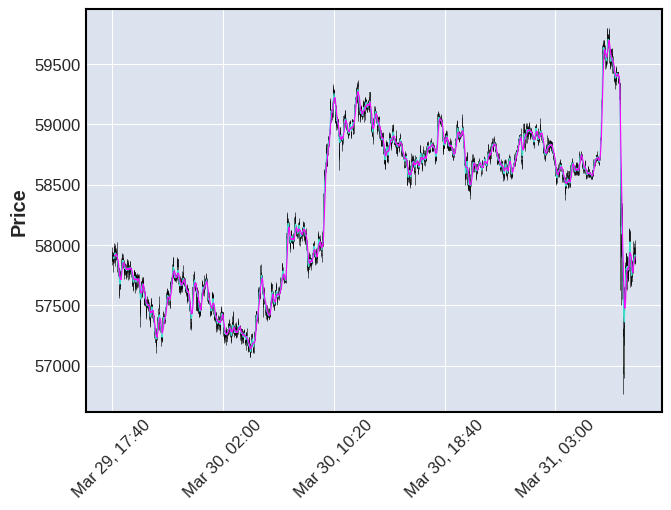

In [237]:
# matplotlibfinance github:  https://github.com/matplotlib/mplfinance
iday = df1.loc[start:end,:]
mpf.plot(iday,type='candle',mav=(7,12))

In [238]:
# reindexing for 1m
date_index2 = pd.date_range(start,end,freq='T')
rbuydf = buydf.reindex(date_index2)
rbuydf.head()

,open_rate
2021-03-29 17:40:00,NaN
2021-03-29 17:41:00,NaN
2021-03-29 17:42:00,NaN
2021-03-29 17:43:00,NaN
2021-03-29 17:44:00,NaN


In [239]:
rselldf = selldf.reindex(date_index2)
rselldf.head()

,close_rate
2021-03-29 17:40:00,NaN
2021-03-29 17:41:00,NaN
2021-03-29 17:42:00,NaN
2021-03-29 17:43:00,NaN
2021-03-29 17:44:00,NaN


In [240]:
#how many rows the reindexed df has
# rows must all be same size 
rbuydfrows = rbuydf.shape[0]
rselldfrows = rselldf.shape[0]
idayrows = iday.shape[0]
print(idayrows)
print(rbuydfrows)
print(rselldfrows)

2361
2361
2361


/home/ubuntu/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


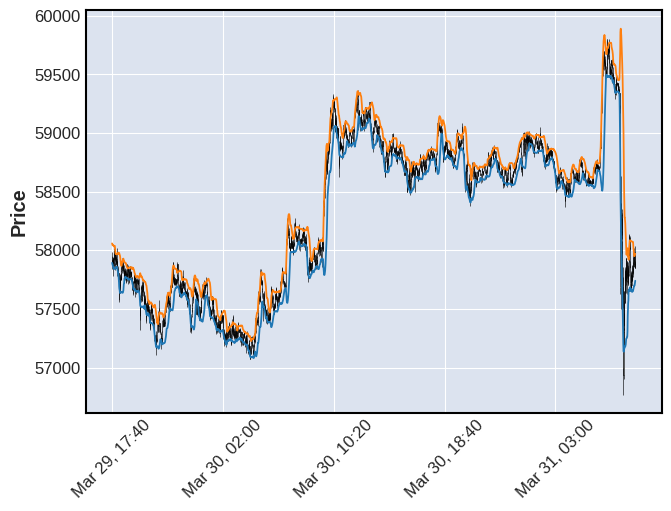

In [241]:
#indicators
bb = iday[['Bollinger Low','Bollinger High']]  # DataFrame with two columns
apd  = mpf.make_addplot(bb)
mpf.plot(iday,type='candle',addplot=apd)

In [242]:
''' 

    The strategy I am testing in this case is as follows: 
    
    Execute Buy when following criterium are met: 
    low < lower bollinger band 
    RSI < 18
    
    Execute Sell when following criterium are met:
    high > upper bollinger band
    RSI > 62
    
'''


' \n\n    The strategy I am testing in this case is as follows: \n    \n    Execute Buy when following criterium are met: \n    low < lower bollinger band \n    RSI < 18\n    \n    Execute Sell when following criterium are met:\n    high > upper bollinger band\n    RSI > 62\n    \n'

/home/ubuntu/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/home/ubuntu/anaconda3/lib/python3.8/site-packages/mplfinance/plotting.py:535: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


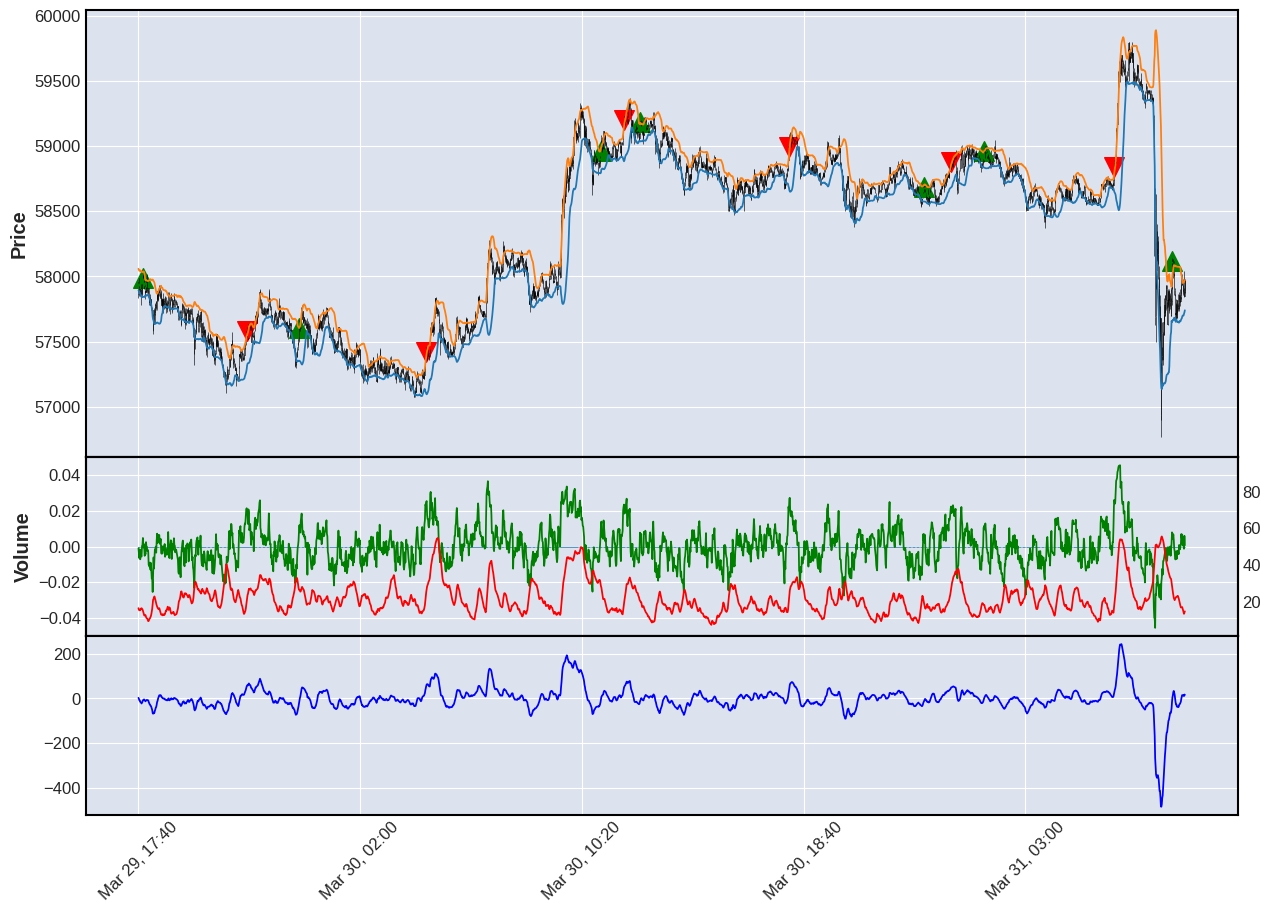

In [243]:
#adding trade data
#this chart shows bollinger bands and buy sell data from backtesting 
iday = df1.loc[start:end,:]

idaybuy = rbuydf.loc[start:end,:]
idaysell = rselldf.loc[start:end,:]


apds = [ mpf.make_addplot(bb),
         mpf.make_addplot((iday['RSI']),panel=1,color='g'),
         mpf.make_addplot((iday['ADX']),panel=1,color='r'),
         mpf.make_addplot((iday['MACD']),panel=2,color='b'),
         mpf.make_addplot(idaybuy,type='scatter',markersize=200,marker='^',color='g'),
         mpf.make_addplot(idaysell,type='scatter',markersize=200,marker='v',color='r'),
        
       ]

mpf.plot(iday,type='candle',addplot=apds,figscale=2,volume=True)

# green triangles are buy orders
# red triangle are sell orders
# rsi is green adx is red 

# if it says "zero-size array to reduction operation maximum which has no identity" it means
# there were no trades made in given timeframe



In [ ]:
no_of_buy = buydf.shape[0]
no_of_sell = selldf.shape[0]
no_of_trades = no_of_buy + no_of_sell

profit = (df['delta'].sum()) / 100

print('Number of Buy and Sell Trades :', no_of_trades)
print(profit, '%')

In [ ]:
'''
    Things to think about: 
   
    Many factors go into developing a strategy. In this specific case, the strategy was 
    on the 1m timeframe. It also was only able to trade $100 at a time on only one pair.
    
    Stoploss was set at -2%
    
    I want to first develop a good strategy on a single pair and then allow the bot 
    to trade 25+ pairs.
    
    The RSI / bollinger band strategy is interesting to me however more analysis is 
    required. 
    
    I need to keep looking for momentum indicators as well as other insightful indicators.
    
    If I find a good strategy in code 1.0, I can then give those indicators and strategies
    to a neural net.
    
    I want to also import predicted df from Prophet or Tensorflow and give it to freqtrade 
    to do backtesting on. 
    
    I also need to check out hyperoptimization on freqtrade. 
    
    
    


'''

In [ ]:
#df.to_json(r'/home/ubuntu/Desktop/trades.json', orient="values")

In [ ]:
#df.rename(columns={'0':'unix', '1':'open', '2':'high', '3':'low', '4':'Adj Close'}, inplace=True)